# Plot DA simulation

In [5]:
%cd Experiment-Simulation

/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/local/replay/Experiment-Simulation


Expected 0 gap junctions, found 10000 gap junction rows
Loading 21 neurons with 165 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [0, 4, 6, 7, 10, 13, 14, 15, 16, 18]
Plotted 10 traces (total 21)
Saving to figure Network-spikes-6-dSPN-colour.svg


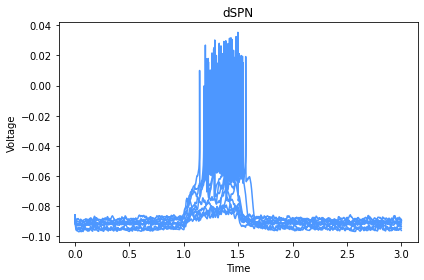

<Figure size 432x288 with 0 Axes>

!!! Excluding first 0s from the plot
Plotting traces: [1, 2, 3, 5, 8, 9, 11, 17, 19, 20]
Plotted 10 traces (total 21)
Saving to figure Network-spikes-6-iSPN-colour.svg


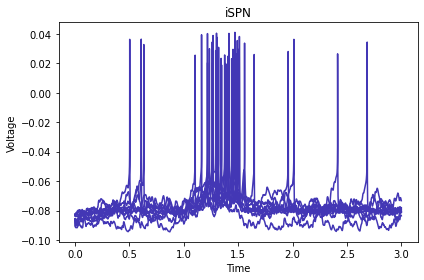

<Figure size 432x288 with 0 Axes>

!!! Excluding first 0s from the plot
Plotting traces: [12]
Plotted 1 traces (total 21)
Saving to figure Network-spikes-6-FSN-colour.svg


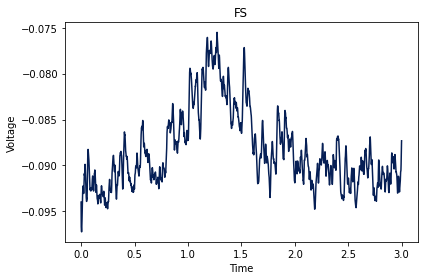

<Figure size 432x288 with 0 Axes>

In [2]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

network_path = 'Dopamine-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-network-level6.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


Unable to guess ID, using 666.
Expected 0 gap junctions, found 10000 gap junction rows
Loading 21 neurons with 165 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [0, 4, 6, 7, 10, 13, 14, 15, 16, 18]
Plotted 10 traces (total 21)
Saving to figure Network-spikes-666-dSPN-colour.svg


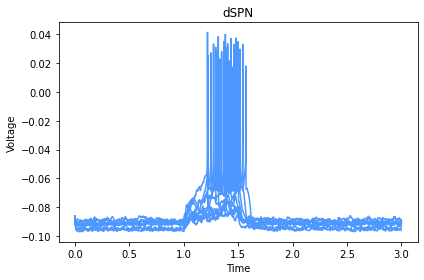

<Figure size 432x288 with 0 Axes>

!!! Excluding first 0s from the plot
Plotting traces: [1, 2, 3, 5, 8, 9, 11, 17, 19, 20]
Plotted 10 traces (total 21)
Saving to figure Network-spikes-666-iSPN-colour.svg


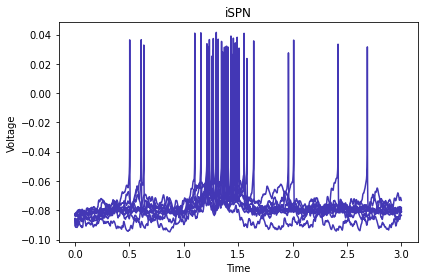

<Figure size 432x288 with 0 Axes>

!!! Excluding first 0s from the plot
Plotting traces: [12]
Plotted 1 traces (total 21)
Saving to figure Network-spikes-666-FSN-colour.svg


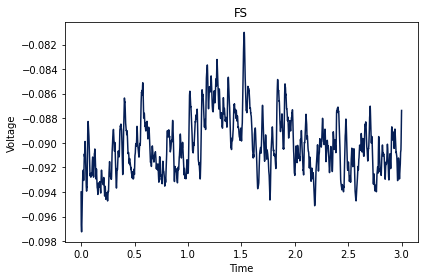

<Figure size 432x288 with 0 Axes>

In [3]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

network_path = 'Dopamine-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-network-control.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


In [16]:
from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces
import numpy as np
import matplotlib.pyplot as plt

In [17]:
fn = ['Dopamine-network/simulation/network-voltage-DA-network-level1.csv',\
     'Dopamine-receptor-network/simulation/network-voltage-DA-network-level1.csv']

nf = ['Dopamine-network/network-synapses.hdf5',\
     'Dopamine-network/network-synapses.hdf5']



nl = comparePlotTraces(fileNames=fn,\
                      networkFiles=nf,labels=['DA', 'Receptor'],colours=['black','red'],save_dir='Compare-network/')
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['DA', 'Receptor'],colours=['black','red'])

Loading 21 neurons with 215 synapses and 0 gap junctions
Loading 21 neurons with 215 synapses and 0 gap junctions
Loading 21 neurons with 215 synapses and 0 gap junctions
Loading 21 neurons with 215 synapses and 0 gap junctions


In [20]:
def plot_dopamine_control(obj_loaded_traces,type_cell='dSPN'):
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    
   
    
    control = np.array([*data_dict[0].values()])

    da = np.array([*data_dict[1].values()])
    
    control_m = np.mean(control,axis=0)
    control_std = np.std(control,axis=0)
    
    da_m = np.mean(da,axis=0)
    da_std = np.std(da,axis=0)
    
    
    time = np.arange(0,3000.5,0.5)
    for i in np.arange(1,10,1):
            fig = plt.figure()           
            ax = fig.add_subplot(111)
            ax.plot(time,control[i]*1e3,c='black')
            ax.plot(time,da[i]*1e3,c='red')
            ax.set_ylabel('Membrane potential (mV)')
            ax.set_xlabel('Time(ms)')
            
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')
            ax.plot(np.arange(2500,3000),np.ones_like(np.arange(2500,3000))*-75,c='black')
            ax.text(2500,-74,'500 ms')

            if max(da[i])>0:
                ax.set_ylim([-100,40])
                ax.plot(2500*np.ones_like(np.arange(-60,-40)),np.arange(-60,-40),c='black')
                ax.text(2550,-40,'20 mV')
            else:
                ax.set_ylim([-100,-70])
                ax.plot(2500*np.ones_like(np.arange(-80,-75)),np.arange(-80,-75),c='black')
                ax.text(2550,-78,'5 mV')
            
            fig.savefig('Level4/dopamine-control-traces'+str(i)+type_cell+".svg")
            
    plt.figure(0)
    
    plt.plot(time,control_m,c='black')
    plt.plot(time,da_m,c='red')
    plt.fill_between(time,control_m-control_std,control_m+control_std,alpha=.1,color='black')
    plt.fill_between(time,da_m-da_std,da_m+da_std,alpha=.1,color='red')      
    
    plt.show()

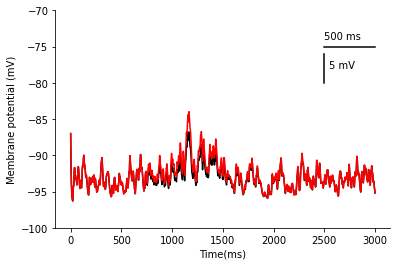

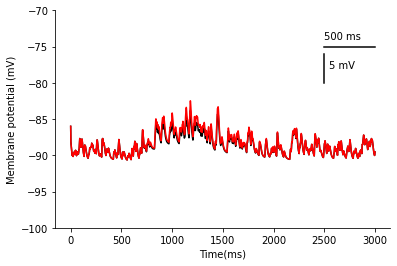

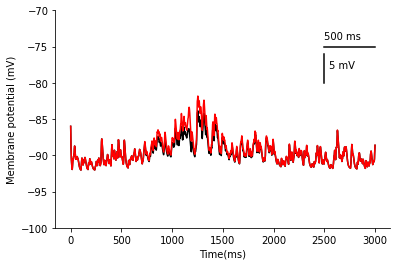

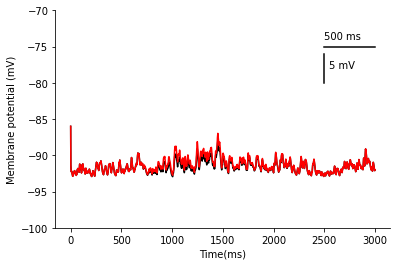

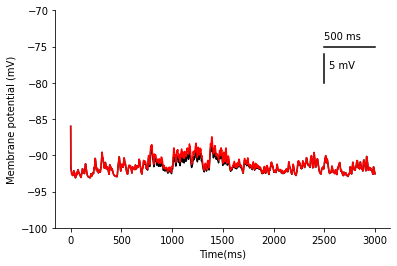

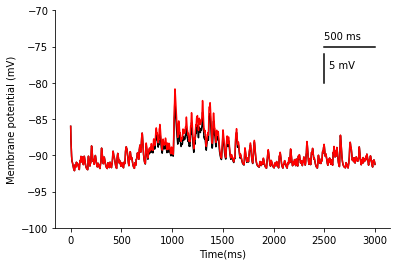

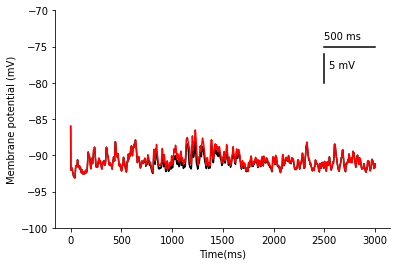

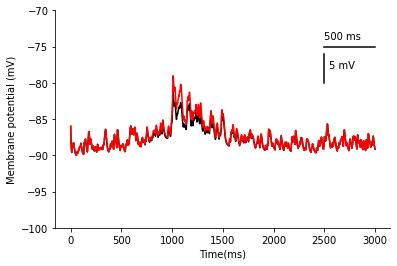

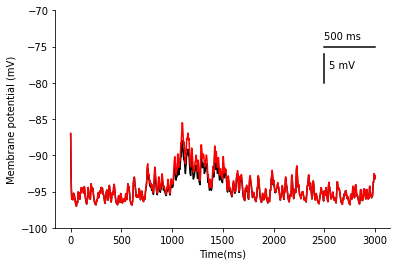

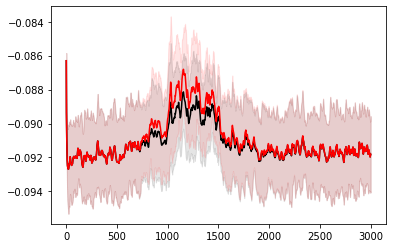

In [21]:
plot_dopamine_control(kl,type_cell='dSPN')

<IPython.core.display.Javascript object>


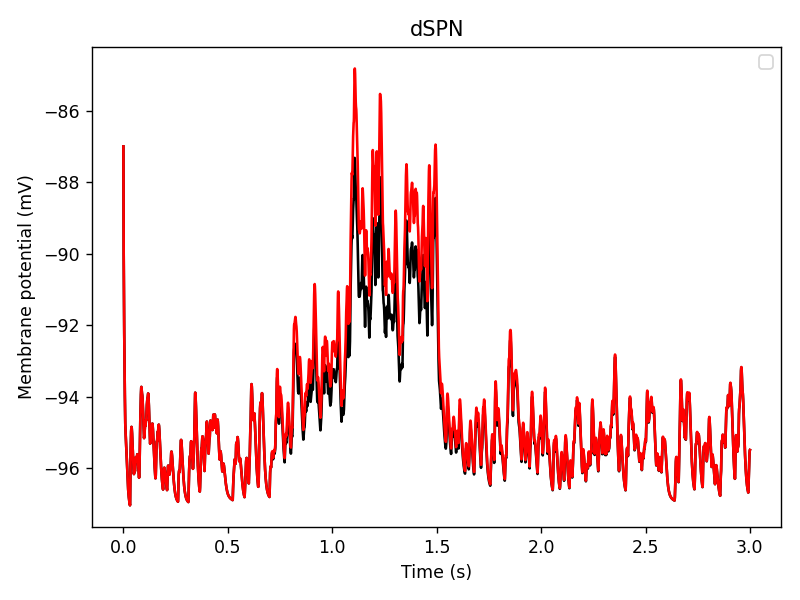

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-1-dSPN-colour.svg


<IPython.core.display.Javascript object>


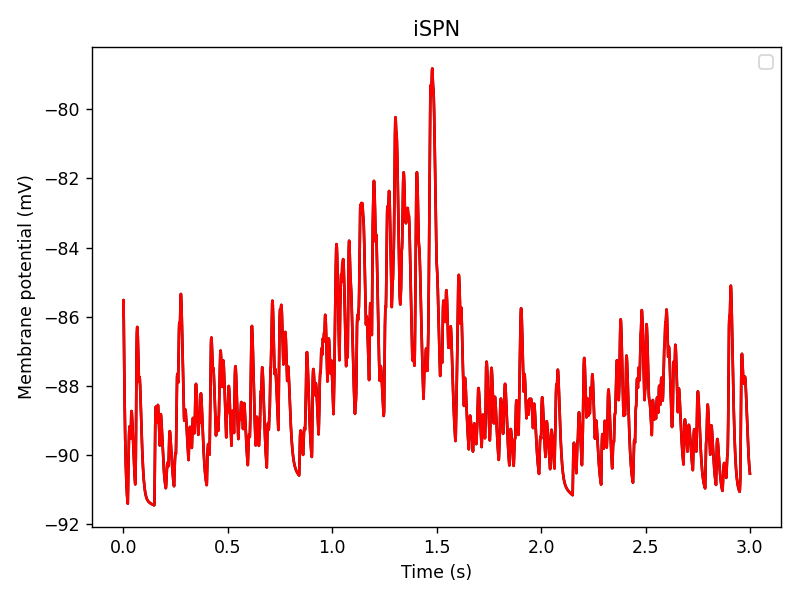

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-1-iSPN-colour.svg


<IPython.core.display.Javascript object>


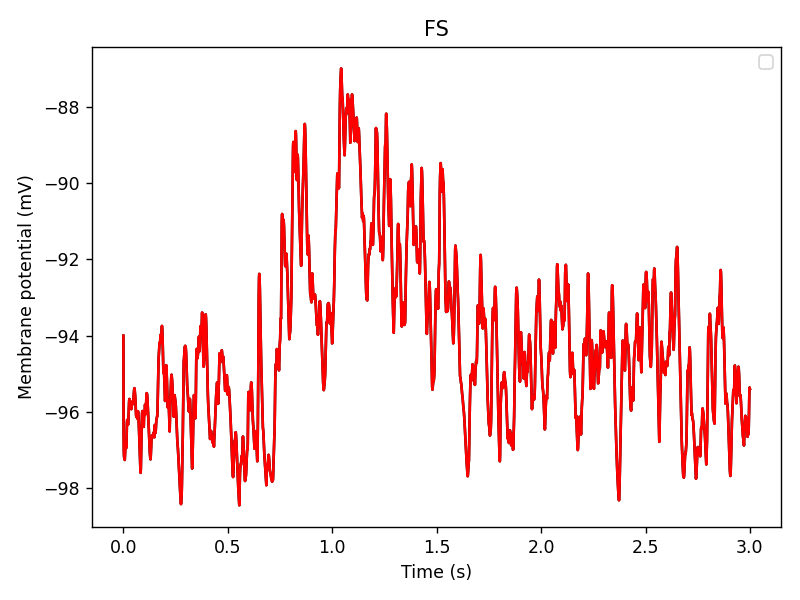

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-1-FS-colour.svg


In [24]:
%matplotlib notebook
plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 1

nl.plotTraceNeuronType(neuronType="dSPN", nTraces=1, offset=plot_offset, skipTime=skip_time)
nl.plotTraceNeuronType(neuronType="iSPN", nTraces=1, offset=plot_offset, skipTime=skip_time)
nl.plotTraceNeuronType(neuronType="FSN", nTraces=1, offset=plot_offset, skipTime=skip_time)


In [133]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


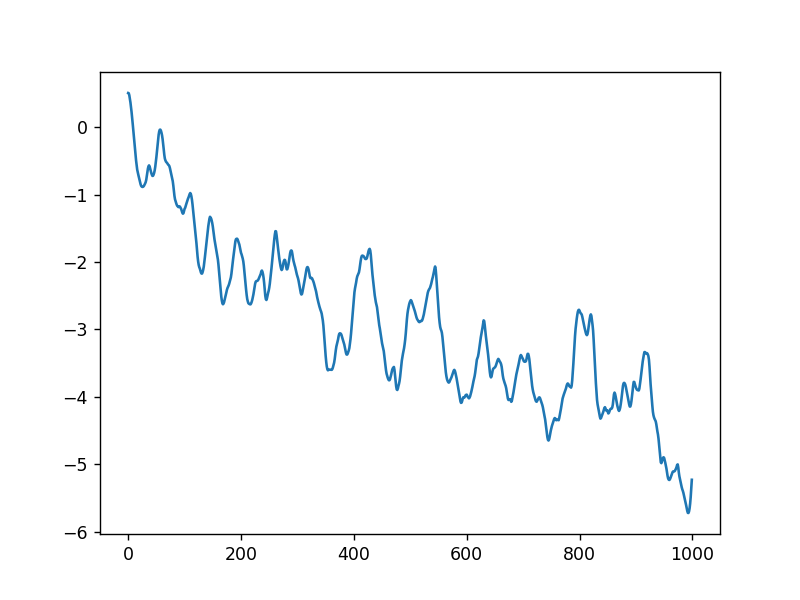

In [134]:
depol = dict()
plt.figure(10)
for k, volt in data[1].items():
    if max(volt) < 0:
        depol.update({k : data[0][k] - volt})
        #plt.plot(depol[k])
plt.plot(np.array([*depol.values()]).mean(axis=0)[int(1/5e-4):int(1.5/5e-4)]*1e3)
plt.show()

In [135]:
np.mean(np.array([*depol.values()]).mean(axis=0)[int(1/5e-4):int(1.5/5e-4)]*1e3)

-2.92975738

In [136]:
data = kl.get_traces(neuronType="dSPN")
data_spikes = dict()
data_average = dict()
for ctr, network in data.items():
    data_spikes.update({ctr : dict()})
    data_average.update({ctr : dict()})
    for k, volt in network.items():
        neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
        spike = elp.spike_train_generation.threshold_detection(neov)
        data_spikes[ctr].update({k : spike})

        if len(spike) != 0:
            av = elp.statistics.mean_firing_rate(spike,t_start=0.5 * pq.s, t_stop= 2 *pq.s)
        else:
            av = 0 * pq.Hz
        data_average[ctr].update({k : av})

<IPython.core.display.Javascript object>


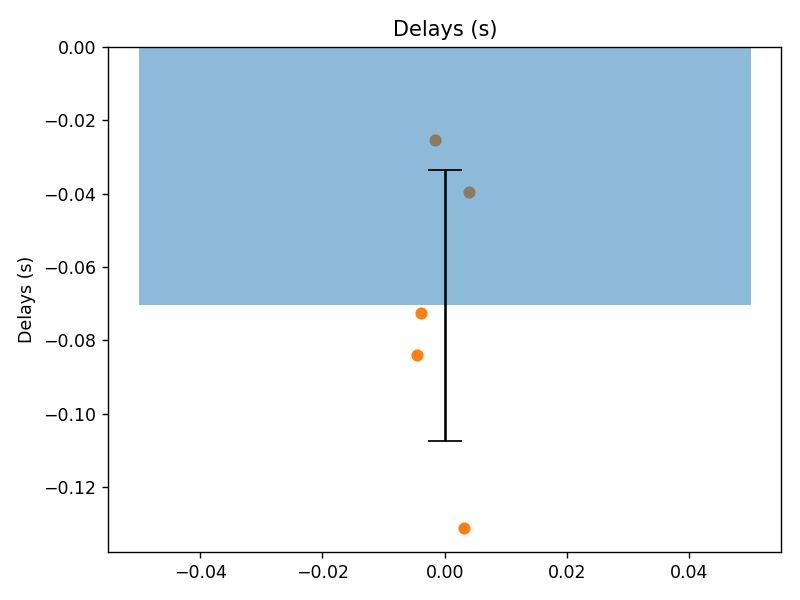

In [137]:
delays = list()
for k, st in data_spikes[1].items():
    if len(st) > 0 and len(data_spikes[0][k])>0:
        delay = min(data_spikes[0][k].tolist()) - min(st.tolist())
        delays.append(delay)

fig, ax = plt.subplots()
ax.bar([0], np.array(delays).mean(),yerr=np.array(delays).std(), align='center',alpha=0.5, ecolor='black', capsize=10,width=0.1)
ax.scatter(np.random.rand(len(delays))*0.01 -0.005 ,delays)

ax.set_ylabel('Delays (s)')
ax.set_title('Delays (s)')
#ax.set_xticks([0])
#ax.set_xticklabels(['Compare'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [138]:
np.array([*data_average[0].values()]).mean()
np.array([*data_average[0].values()]).std()

5.272991982209384

In [139]:
np.array([*data_average[1].values()]).mean()
np.array([*data_average[1].values()]).std()

3.702851753866351

In [140]:
np.array([*data_average[1].values()])

array([ 0.        ,  0.66666667,  0.        ,  0.        , 12.66666667,
        0.66666667,  1.33333333,  0.        ,  0.        ,  1.33333333])

<IPython.core.display.Javascript object>


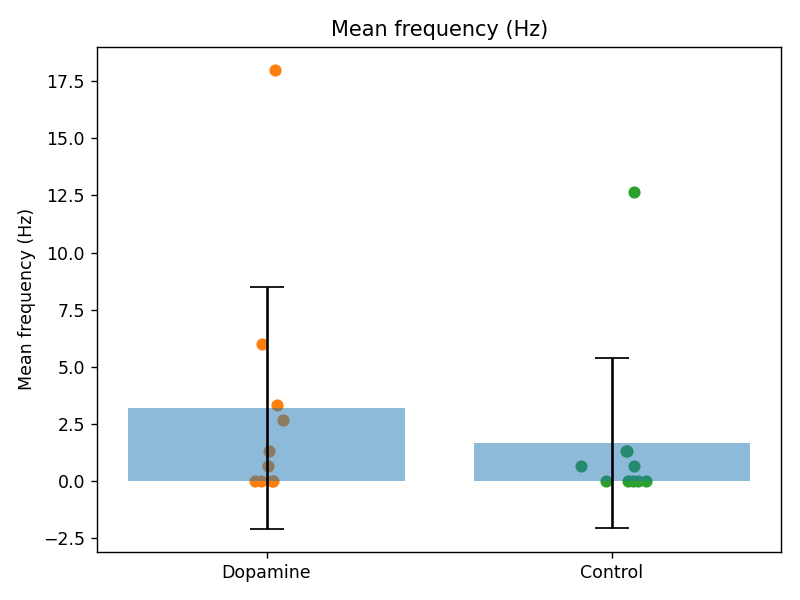

In [141]:
fig, ax = plt.subplots()
ax.bar([0,1], [np.array([*data_average[0].values()]).mean(),np.array([*data_average[1].values()]).mean()],yerr=[np.array([*data_average[0].values()]).std(),np.array([*data_average[1].values()]).std()], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.scatter(np.random.rand(len(np.array([*data_average[0].values()])))*0.2 - 0.1,np.array([*data_average[0].values()]))
ax.scatter(np.random.rand(len(np.array([*data_average[1].values()])))*0.2 + 0.9,np.array([*data_average[1].values()]))
ax.set_ylabel('Mean frequency (Hz)')
ax.set_title('Mean frequency (Hz)')
ax.set_xticks([0,1])
ax.set_xticklabels(['Dopamine', 'Control'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

<IPython.core.display.Javascript object>


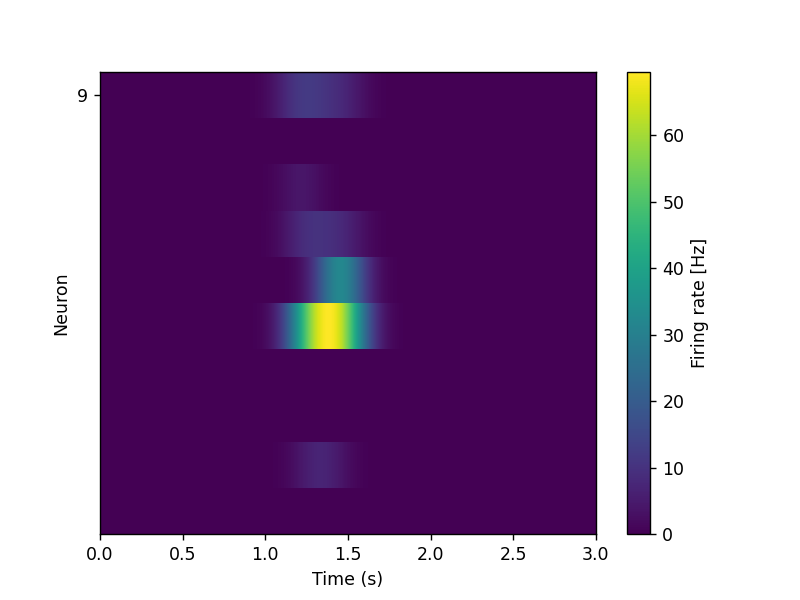

In [142]:
import quantities as pq
from elephant import statistics, kernels
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh
np.random.seed(6)
spiketrains = [*data_spikes[0].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates0 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates0)
plt.show()

<IPython.core.display.Javascript object>


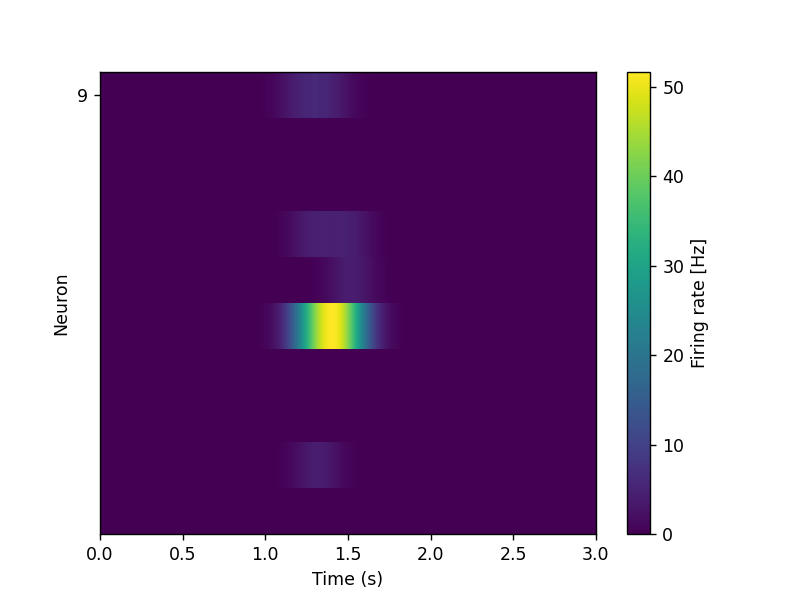

In [68]:
spiketrains = [*data_spikes[1].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates1 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates1)
plt.show()

<IPython.core.display.Javascript object>


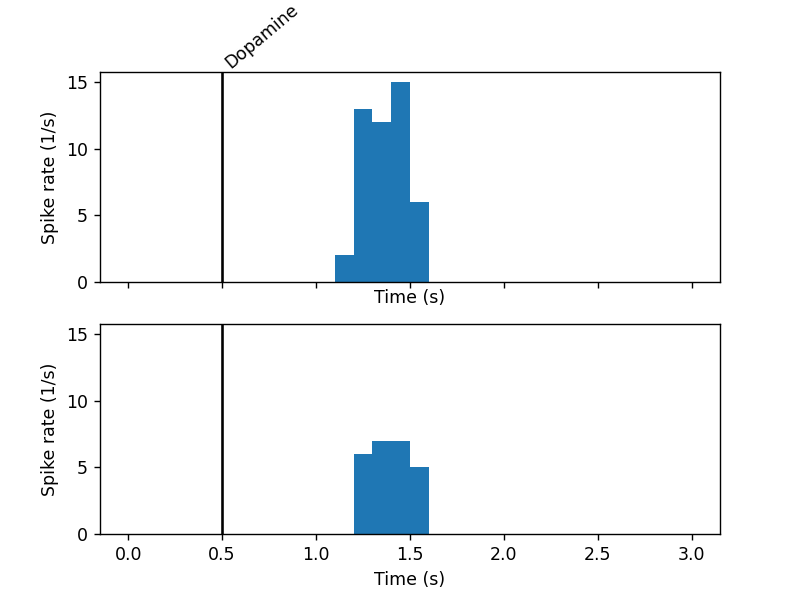

In [73]:
import neo
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
from viziphant.events import add_event

np.random.seed(11)

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
event = neo.Event([0.5]*pq.s, labels=['Dopamine'])
k = 0
for axis in axes:
    spiketrains = [*data_spikes[k].values()]
    histogram = statistics.time_histogram(spiketrains,
                                          bin_size=0.1 * pq.s,
                                          output='rate')
    plot_time_histogram(histogram, axes=axis, units='s')
    k = k + 1
add_event(axes, event=event)
plt.show()

<IPython.core.display.Javascript object>


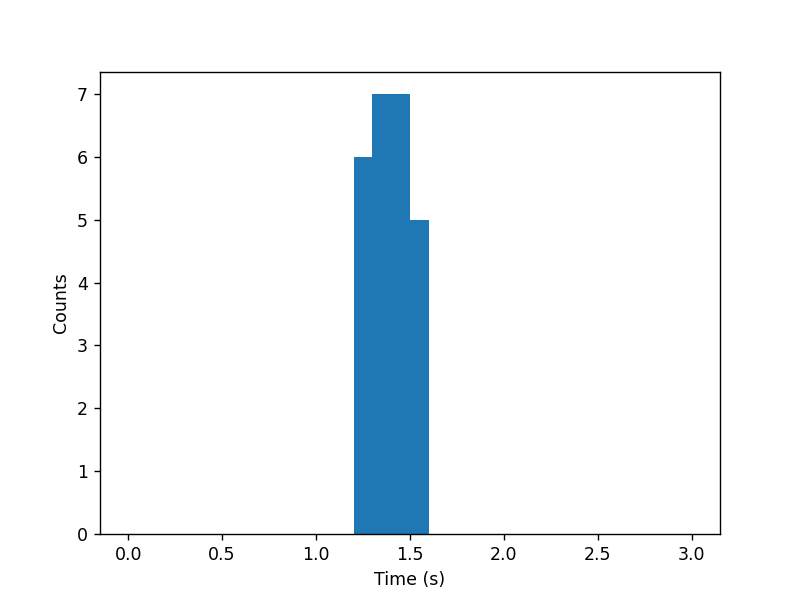

In [69]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains = spiketrains = [*data_spikes[1].values()]
histogram1 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram1, units='s')
plt.show()

<IPython.core.display.Javascript object>


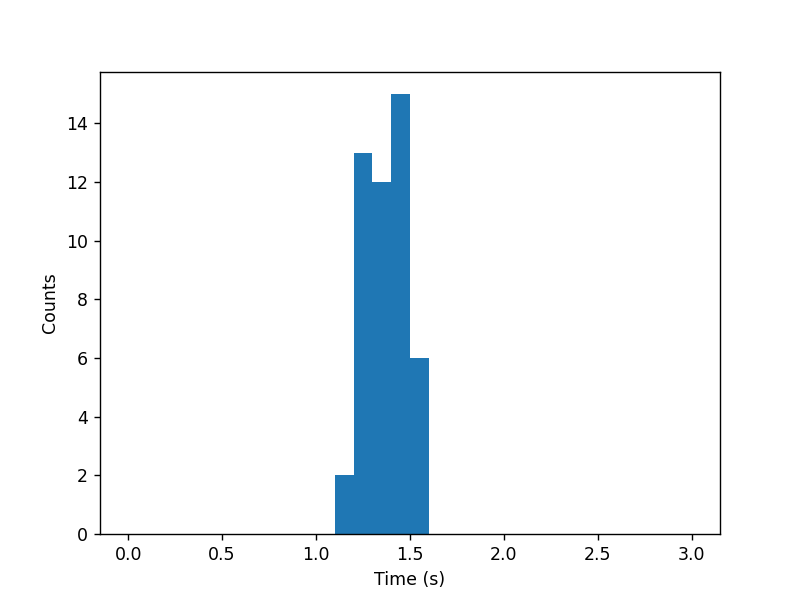

In [70]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains =  [*data_spikes[0].values()]
histogram0 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram0, units='s')
plt.show()

In [74]:
hist = histogram0.as_array() - histogram1.as_array()

<IPython.core.display.Javascript object>


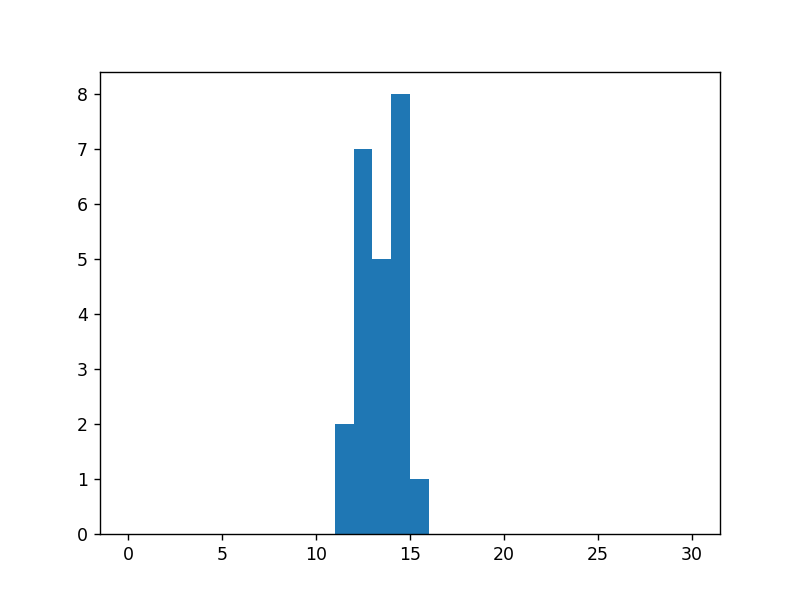

<BarContainer object of 30 artists>

In [75]:
plt.figure(0)
plt.bar(np.arange(len(np.transpose(hist)[0])),np.transpose(hist)[0],align='edge',width=1)

In [89]:
data = kl.get_traces(neuronType="iSPN")
data_spikes = dict()
for ctr, network in data.items():
    data_spikes.update({ctr : dict()})
    for k, volt in network.items():
        neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
        spike = elp.spike_train_generation.threshold_detection(neov)
        data_spikes[ctr].update({k : spike})

In [92]:
delays = list()
for k, st in data_spikes[1].items():
    if len(st) > 0 and len(data_spikes[0][k])>0:
        delay = min(st.tolist()) - min(data_spikes[0][k].tolist())
        delays.append(delay)

<IPython.core.display.Javascript object>


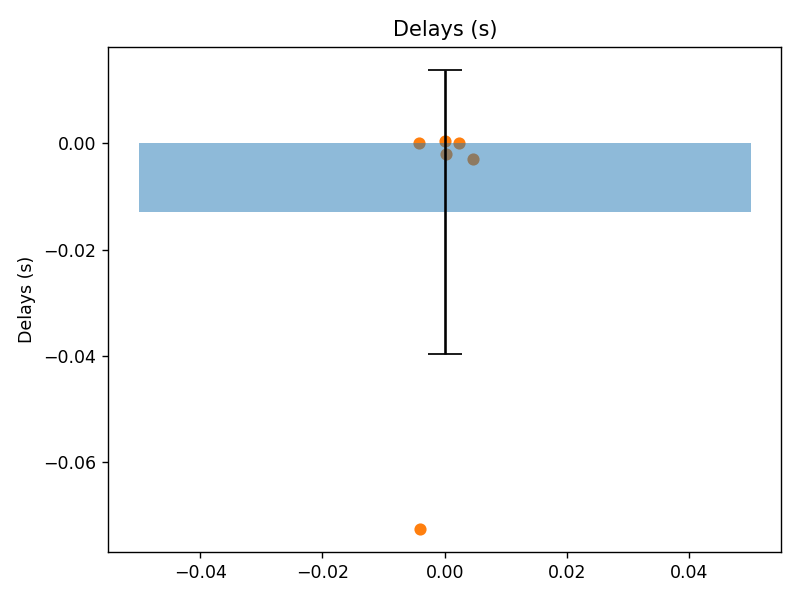

In [103]:
fig, ax = plt.subplots()
ax.bar([0], np.array(delays).mean(),yerr=np.array(delays).std(), align='center',alpha=0.5, ecolor='black', capsize=10,width=0.1)
ax.scatter(np.random.rand(len(delays))*0.01 -0.005 ,delays)

ax.set_ylabel('Delays (s)')
ax.set_title('Delays (s)')
#ax.set_xticks([0])
#ax.set_xticklabels(['Compare'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

<IPython.core.display.Javascript object>


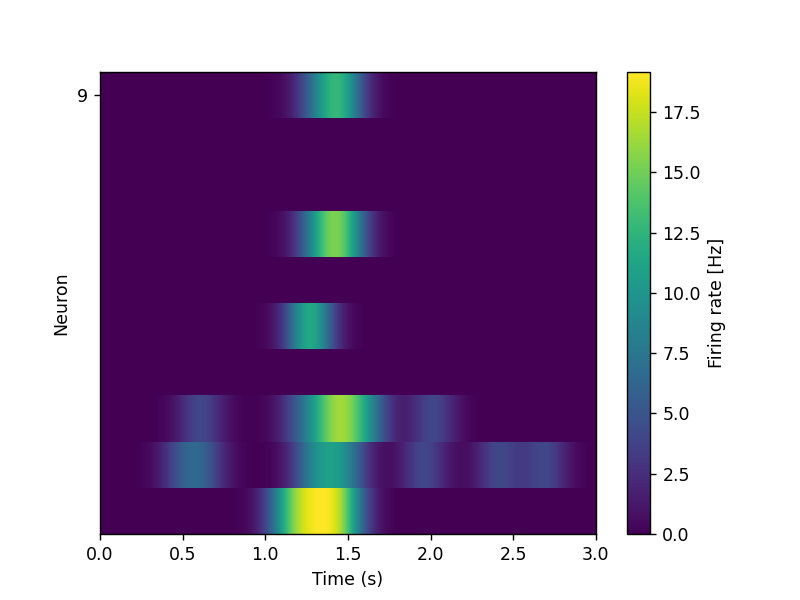

In [77]:
import quantities as pq
from elephant import statistics, kernels
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh
np.random.seed(6)
spiketrains = [*data_spikes[0].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates0 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates0)
plt.show()

<IPython.core.display.Javascript object>


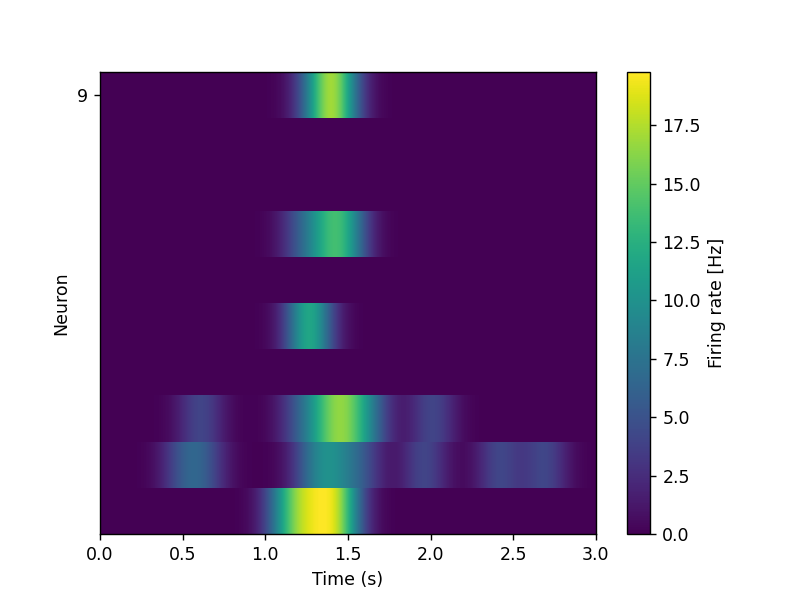

In [78]:
spiketrains = [*data_spikes[1].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates1 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates1)
plt.show()

<IPython.core.display.Javascript object>


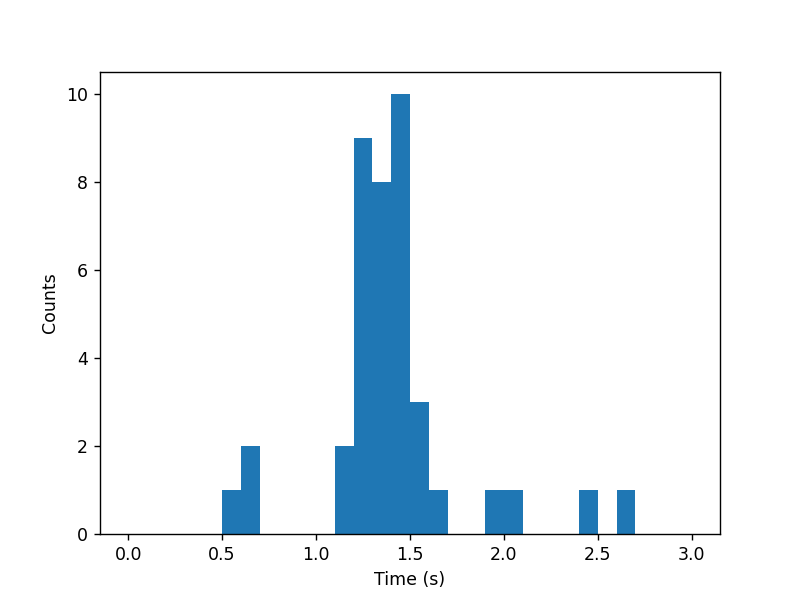

In [79]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains = spiketrains = [*data_spikes[1].values()]
histogram1 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram1, units='s')
plt.show()

<IPython.core.display.Javascript object>


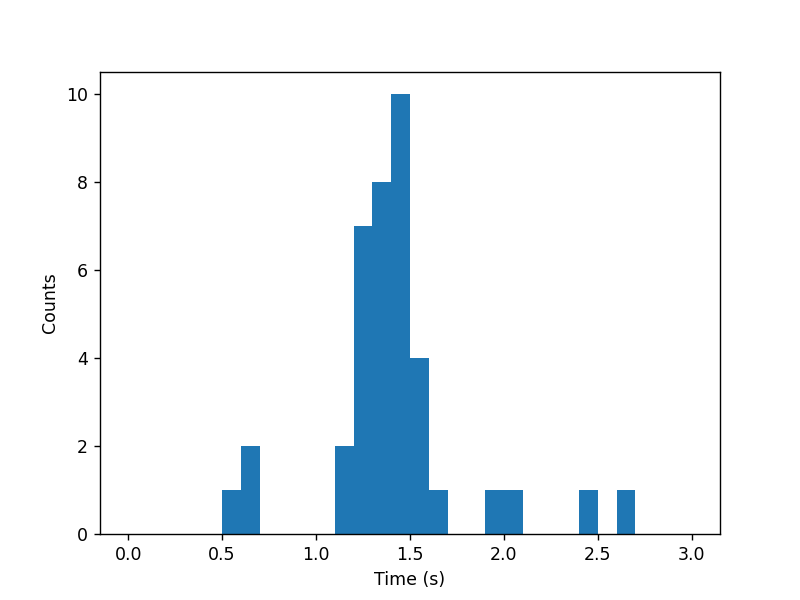

In [80]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains =  [*data_spikes[0].values()]
histogram0 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram0, units='s')
plt.show()

In [81]:
hist = histogram0.as_array() - histogram1.as_array()

<IPython.core.display.Javascript object>


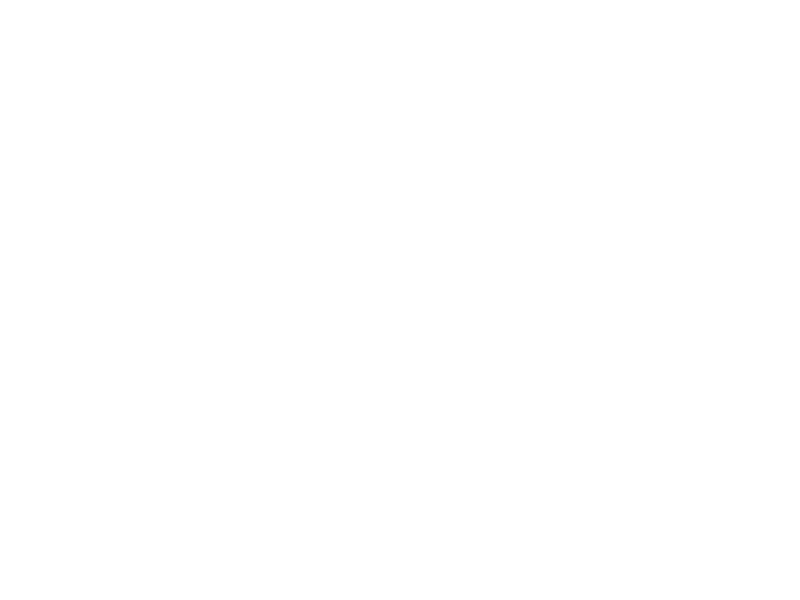

In [82]:
%matplotlib notebook
plt.figure(4)
plt.step(np.arange(len(np.transpose(histogram0.as_array())[0])),np.transpose(histogram0.as_array())[0])
plt.show()

<IPython.core.display.Javascript object>


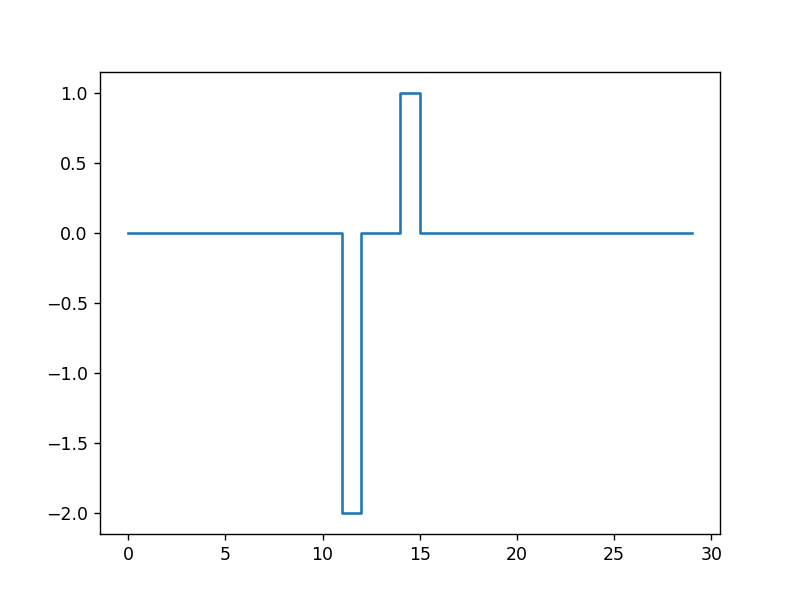

In [83]:
%matplotlib notebook
plt.figure(4)
plt.step(np.arange(len(np.transpose(hist)[0])),np.transpose(hist)[0])
plt.show()

In [84]:
histogram0.as_array()

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 7],
       [ 8],
       [10],
       [ 4],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0]])